In [2]:
'''
Main Research Questions: 
1) Probabiility of factual vs nonfactual tokens -- last layer and early layers
2) Generated token probability at each layer 


2) Which layers do tokens tend to first surface in? 
- early exit equal predicton -- a) graph showing % of generated tokens predicted in earlier layers and b)graph showing early layer confidence of predicted token same as ge
- early exit top 3 





'''

'\nMain Research Questions: \n1) Probabiility of factual vs nonfactual tokens -- last layer and early layers\n2) Generated token probability at each layer \n\n\n2) Which layers do tokens tend to first surface in? \n- early exit equal predicton -- a) graph showing % of generated tokens predicted in earlier layers and b)graph showing early layer confidence of predicted token same as ge\n- early exit top 3 \n\n\n\n\n\n'

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForCausalLM


In [8]:
model_path = {'mistral7b': 'mistralai/Mistral-7B-Instruct-v0.1',
             'falcon7b': 'tiiuae/falcon-7b-instruct',
              'llama7b': '/work/frink/models/Llama-2-7b-chat-hf',
             'flanul2': 'google/flan-ul2'}

def load_tokenizer(model_name):
    tokenizer = AutoTokenizer.from_pretrained(model_path[model_name],
                                         cache_dir = '/scratch/ramprasad.sa/huggingface_models')
    return tokenizer

def refine_df(df_path):
    df = pd.read_csv(df_path)
    #### since teacher forcing, make sure to only use rows where predicted is same as prev generated
    df['target_token_id'] = [eval(row['target_token'].split('_')[-1]) for idx, row in df.iterrows()]
    df = df[df['target_token_id'] == df['pred_token_layer32']]
    return df

def read_model_probabilities_df(model_name, origin):
    data_path = f'/scratch/ramprasad.sa/probing_summarization_factuality/metric_scores/Genaudit/layer_wise_uncertainty_{model_name}_{origin}_document_context.csv'
    df_model = refine_df(data_path)
    tokenizer = load_tokenizer(model_name)
    df_model['model'] = [model_name] * len(df_model)
    return tokenizer, df_model

falcon_tokenizer, df_falcon_xsum = read_model_probabilities_df('falcon7b', 'XSUM')
llama_tokenizer, df_llama_xsum = read_model_probabilities_df('llama7b', 'XSUM')
mistral_tokenizer, df_mistral_xsum = read_model_probabilities_df('mistral7b', 'XSUM')
print(len(set(df_falcon_xsum['docid'])), len(set(df_llama_xsum['docid'])), len(set(df_mistral_xsum['docid'])))


mistral_tokenizer, df_mistral_acibench = read_model_probabilities_df('mistral7b', 'ACIBENCH')
falcon_tokenizer, df_falcon_acibench = read_model_probabilities_df('falcon7b', 'ACIBENCH')
llama_tokenizer, df_llama_acibench = read_model_probabilities_df('llama7b', 'ACIBENCH')

mistral_tokenizer, df_mistral_reddit = read_model_probabilities_df('mistral7b', 'REDDIT')
falcon_tokenizer, df_falcon_reddit = read_model_probabilities_df('falcon7b', 'REDDIT')
llama_tokenizer, df_llama_reddit = read_model_probabilities_df('llama7b', 'REDDIT')
print(len(set(df_mistral_reddit['docid'])), len(set(df_falcon_reddit['docid'])), len(set(df_llama_reddit['docid'])))

/home/ramprasad.sa/.conda/envs/probe/lib/python3.8/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/ramprasad.sa/.conda/envs/probe/lib/python3.8/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


30 30 30


/home/ramprasad.sa/.conda/envs/probe/lib/python3.8/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/ramprasad.sa/.conda/envs/probe/lib/python3.8/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/ramprasad.sa/.conda/envs/probe/lib/python3.8/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/ramprasad.sa/.conda/envs/probe/lib/python3.8/site-packages/huggingf

30 26 30


In [9]:
list(df_mistral_xsum.keys())[:50]

['Unnamed: 0',
 'target_token',
 'label',
 'prev_hidden_state_sim_layer1',
 'prev_hidden_state_sim_layer2',
 'prev_hidden_state_sim_layer3',
 'prev_hidden_state_sim_layer4',
 'prev_hidden_state_sim_layer5',
 'prev_hidden_state_sim_layer6',
 'prev_hidden_state_sim_layer7',
 'prev_hidden_state_sim_layer8',
 'prev_hidden_state_sim_layer9',
 'prev_hidden_state_sim_layer10',
 'prev_hidden_state_sim_layer11',
 'prev_hidden_state_sim_layer12',
 'prev_hidden_state_sim_layer13',
 'prev_hidden_state_sim_layer14',
 'prev_hidden_state_sim_layer15',
 'prev_hidden_state_sim_layer16',
 'prev_hidden_state_sim_layer17',
 'prev_hidden_state_sim_layer18',
 'prev_hidden_state_sim_layer19',
 'prev_hidden_state_sim_layer20',
 'prev_hidden_state_sim_layer21',
 'prev_hidden_state_sim_layer22',
 'prev_hidden_state_sim_layer23',
 'prev_hidden_state_sim_layer24',
 'prev_hidden_state_sim_layer25',
 'prev_hidden_state_sim_layer26',
 'prev_hidden_state_sim_layer27',
 'prev_hidden_state_sim_layer28',
 'prev_hidden_s

In [16]:
''' testing summaries '''

# unique_docids = set(df_falcon['docid'])
# for docid in unique_docids:
#     df_docid = df_falcon[df_falcon['docid'] == docid]
#     print(falcon_tokenizer.decode(df_docid['target_token_id'].values))
#     print('***'*13)

' testing summaries '

In [10]:
df_all_models_xsum = pd.concat([df_falcon_xsum, df_llama_xsum, df_mistral_xsum])
df_all_models_acibench = pd.concat([df_falcon_acibench, df_llama_acibench, df_mistral_acibench])
df_all_models_reddit = pd.concat([df_falcon_reddit, df_llama_reddit, df_mistral_reddit])

print(len(df_all_models_xsum))
df_all_models_acibench.head()
df_all_models = pd..concat
# df_all_models_xsum = df_mistral_xsum

SyntaxError: invalid syntax (2276503228.py, line 7)

In [8]:
df_all_models_xsum['top3_predicted_tokens_layer32']

'REDDIT'

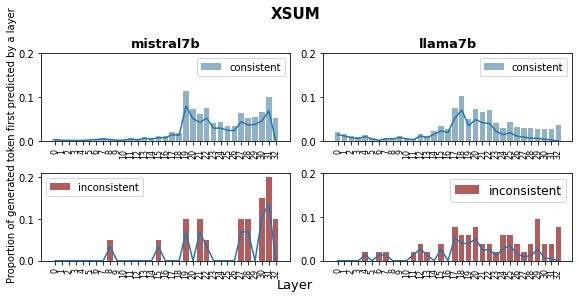

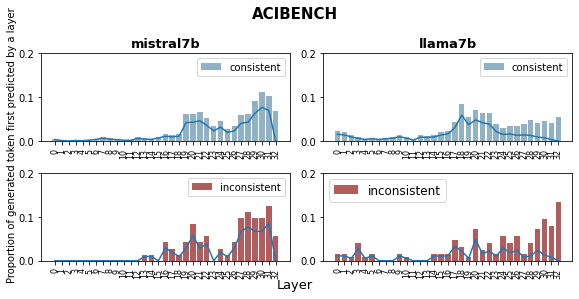

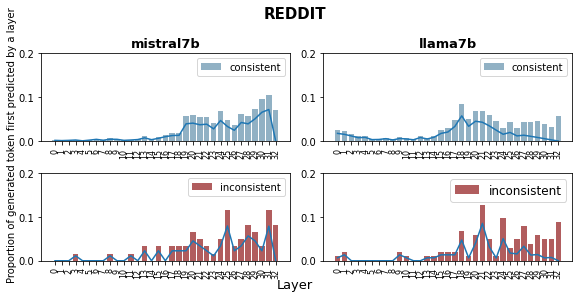

In [200]:
''' Which layer do generated tokens first surface in'''
import seaborn as sns
import matplotlib.pyplot as plt

def viz_barplot_first_surfaced(df, data, print_title = True):
    label_palettes = { 'consistent': '#89B3CC', 'inconsistent': '#BF4F51'}
    unique_models = set(df['model'].values)
    # print(unique_models)
    fig, axes = plt.subplots(2, len(unique_models), figsize=(7, 4))
    fig.suptitle(f'{data.upper()}', 
                     fontsize = 15,
                    weight='bold')
    # if print_title:
    #     fig.suptitle('Proporton of consistent vs inconsistent tokens that first surfaced in a layer via early exit', 
    #                  fontsize = 13,
    #                 weight='bold')
        # fig.text(0.00, 0.5, 'Generated token first predicted', va='center', rotation='vertical')
        
    for label_idx, label in enumerate(list(label_palettes.keys())):
        for model_idx, model in enumerate(unique_models):
            df_model = df[df['model'] == model]
            df_model = df_model[df_model['label'] == label]     
            sns.barplot(x='layer', 
                        y='gen_token_predicted', 
                        hue='label', 
                        data=df_model, 
                        ax=axes[label_idx, model_idx], 
                        palette = label_palettes,
                        errorbar = None

                    )

            # df_layer = df_model[df_model['layer'] == 20]
            # print(sum(df_layer['layer_jsd'].values)/sum())
            sns.lineplot(x='layer', 
                        y='layer_jsd',
                        data=df_model, 
                        ax=axes[label_idx, model_idx], 
                         errorbar = None

                    )
            if label_idx == 0:
                axes[label_idx, model_idx].set_title(f'{model}', fontsize = 13, weight = 'bold')
            
            axes[label_idx, model_idx].set_ylabel('')    
            axes[label_idx, model_idx].set_xlabel('')
            axes[label_idx, model_idx].tick_params(axis='x', rotation=90, labelsize =8)
            
            axes[label_idx, model_idx].set_yticks([i for i in [x * 0.1 for x in range(0,3)]])
            # axes[label_idx, model_idx].tick_params(axis='y', which='both', left=False, labelleft=False)
        # plt.legend(['Factual', 'Non-factual']);
        # Show plot
    fig.text(0.5, 0.0, 'Layer', ha='center', fontsize = 13)
    fig.text(0.0, 0.5, 'Proportion of generated token first predicted by a layer', va='center', rotation='vertical', fontsize = 10)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.savefig(f'first_surfaced_gen_token_{data}.pdf')
    plt.show()
    
### when first surfaced what is the confidence 
def first_layer_surface(df):
    df_format = {'layer': [], 'gen_token_predicted': [], 'layer_jsd': [], 'label': [], 'model': []}
    for idx, row in df.iterrows():
        gen_token = row['pred_token_layer32']
        seen = False
        gen_prob = row[f'pred_prob_layer32']
        for layer_num in range(0, 33):
                pred_token = row[f'pred_token_layer{layer_num}']
                pred_tokens = eval(row[f'top3_predicted_tokens_layer{layer_num}'])
                pred_prob = row[f'pred_prob_layer{layer_num}']
                
                gen_surfaced = 0
                layer_jsd = 0
                # layer_jsd = row[f'jsd_layer{layer_num}']
                ### if generated token is same as layer predicted token and not seen before
                # print(type(gen_token))
                # gen_surfaced = row[f'jsd_layer{layer_num}']
                if (gen_token == pred_token) and (not seen):
                    gen_surfaced = 1
                    layer_jsd = row[f'jsd_layer{layer_num}']
                    # gen_surfaced = pred_prob
                    seen = True
                    
                if layer_num > -1:
                        df_format['layer'] += [layer_num]
                        df_format['layer_jsd'] += [layer_jsd]
                        df_format['gen_token_predicted'] += [gen_surfaced]
                        df_format['label'] += ['consistent' if row['label'] == 0 else 'inconsistent']
                        df_format['model'] += [row['model']]
    df_format = pd.DataFrame(df_format)
    
    df_format_collapsed = {k : [] for k in df_format.keys()}
    
    for label in ['consistent', 'inconsistent']:
        df_label = df_format[df_format['label'] == label]
        
        for model in sorted(list(set(df_format['model'].values))):
            df_label_model = df_label[df_label['model'] == model]
            
            for layer in list(set(df_format['layer'].values)):
                df_label_model_layer = df_label_model[df_label_model['layer'] == layer]
                avg_surfaced = np.mean(df_label_model_layer['gen_token_predicted'])
                avg_jsd = np.mean(df_label_model_layer['layer_jsd'])
                
                df_format_collapsed['layer'] += [layer]
                df_format_collapsed['layer_jsd'] += [avg_jsd]
                df_format_collapsed['gen_token_predicted'] += [avg_surfaced]
                df_format_collapsed['label'] += [label]
                df_format_collapsed['model'] += [model]
    df_format_collapsed = pd.DataFrame(df_format_collapsed)
    return df_format_collapsed
        
df_format_xsum = first_layer_surface(df_all_models_xsum)
viz_barplot_first_surfaced(df_format_xsum, data = 'xsum')


df_format_acibench = first_layer_surface(df_all_models_acibench)
viz_barplot_first_surfaced(df_format_acibench, data = 'acibench', print_title = False)

df_format_reddit = first_layer_surface(df_all_models_reddit)
viz_barplot_first_surfaced(df_format_reddit, data = 'reddit', print_title = False)

##### Do consistent/inconsistent tokens first surface in specific layers? If so, where? 

### No "truthful" or "liar" layers identified. However inconsistent tokens do tend to surface in the later layers

### The layer where a token first appears could provide the best signal for factual classification. 

###Prior research often focuses on training probes using a single layer. However, tokens first surface in different layers, suggesting the need for dynamic layer selection when probing.   




/tmp/ipykernel_2559/3650446070.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='layer_num',
/tmp/ipykernel_2559/3650446070.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='layer_num',


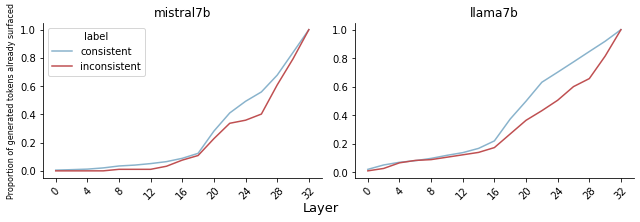

In [203]:
''' By each layer what proporton of tokens have already been predicted at an earlier'''
# x axis layer, y axis % of gen tokens predicted, hue label
# df_format = {layer: [], gen_token_predicted: [], label: []}

import seaborn as sns
import matplotlib.pyplot as plt

def viz_lineplot_gen_prob(df, data):
    label_palettes = { 'consistent': '#89B3CC', 'inconsistent': '#BF4F51'}
    unique_models = set(df['model'].values)
    fig, axes = plt.subplots(1, len(unique_models), figsize=(9, 3))
    # fig.suptitle('Factual vs nonfactual that have already been predicted via early exit(First token of a word)')
    for model_idx, model in enumerate(unique_models):
        df_model = df[df['model'] == model]
        sns.lineplot(x='layer_num', 
                    y='gen_token_predicted', 
                    hue='label', 
                    data=df_model, 
                    ax=axes[model_idx], 
                    palette = label_palettes,
                    ci = None
                     
                )
        axes[model_idx].set_title(f'{model}')
        axes[model_idx].set_xlabel('')
        axes[model_idx].set_ylabel('')
        if model_idx == 0:
            axes[model_idx].set_ylabel('Proportion of generated tokens already surfaced', fontsize=8)
            
        axes[model_idx].tick_params(axis='x', rotation=45)
        axes[model_idx].set_xticks([i for i in range(0, 33, 4)])
        
        axes[model_idx].spines['right'].set_visible(False)
        axes[model_idx].spines['top'].set_visible(False)
        if model_idx != 0:
             axes[model_idx].legend().set_visible(False)
        #     axes[ model_idx].spines['left'].set_visible(False)
        #     axes[model_idx].tick_params(axis='y', which='both', left=False)
            
            
        # plt.legend(['Factual', 'Non-factual']);
        # Show plot
    fig.text(0.5, 0.0, 'Layer', ha='center', fontsize = 13)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.savefig(f'gen_prob_lineplot_{data}.pdf')
    plt.tight_layout()
    plt.show()
    
def cumulative_layer_surfaced(df):
    df_format = {'layer_num': [], 'gen_token_predicted': [], 'label': [], 'model': []}
    for idx, row in df.iterrows():
        gen_token = row['pred_token_layer32']
        gen_surfaced = 0
        for layer_num in range(0, 33):
            pred_token = row[f'pred_token_layer{layer_num}']
            if gen_token == pred_token:
                gen_surfaced = 1
            if layer_num %2 == 0:
                df_format['layer_num'] += [layer_num]
                df_format['gen_token_predicted'] += [gen_surfaced]
                df_format['label'] += ['consistent' if row['label'] == 0 else 'inconsistent']
                df_format['model'] += [row['model']]
    df_format = pd.DataFrame(df_format)
    return df_format
df_format_cumu_surfaced_xsum = cumulative_layer_surfaced(pd.concat([df_all_models_xsum, df_all_models_acibench]))
viz_lineplot_gen_prob(df_format_cumu_surfaced_xsum, data = 'all')

# df_format_cumu_surfaced_acibench = cumulative_layer_surfaced(df_all_models_acibench)
# viz_lineplot_gen_prob(df_format_cumu_surfaced_acibench, data = 'acibench')

# df_format_cumu_surfaced_reddit = cumulative_layer_surfaced(df_all_models_reddit)
# viz_lineplot_gen_prob(df_format_cumu_surfaced_reddit, data = 'reddit')

### Across all models we see that if a token isn't predicted by the last few layers, it s more likely to be inconsistent
### Example by layer 26 in mistral -- over 60% of consistent tokens have already been predicted at a lower layer while, 
### only close to 40% of inconsistent tokens are predicted. We see similar trends for falcon and llama as well 
### Very few tokens are predicted early on in the lower layers, there is no distinctt patterns with faactual and nonfactual
### Majority of the tokens are predicted in the middle or last few layers. With factual tokens more likely to already be surfaced in the middle


# *****

### As we get deeper in the model, what proportion of consistent/inconsistent tokens have already been generated
### Across all models we see that if a token isn't predicted by the last few layers, it s more likely to be inconsistent



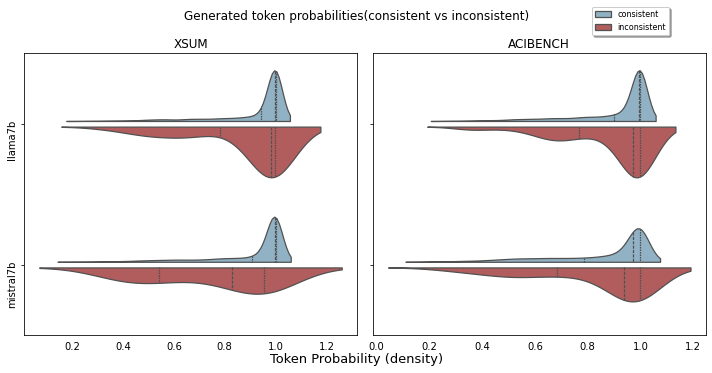

In [204]:
''' Is generated token probability indicative of consistency ?'''
### x axis -- layers
### y axis -- probability of gen token 
### hue --- label 

## df_format = {'layer_num': [], 'gen_token_prob': [], 'label': []}
import seaborn as sns
import matplotlib.pyplot as plt

def viz_lineplot_gen_prob(df):
    label_palettes = { 'consistent': '#89B3CC', 'inconsistent': '#BF4F51'}
    unique_models = set(df['model'].values)
    # fig, axes = plt.subplots(1, len(unique_models), figsize=(15, 5))
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle('Generated token probabilities(consistent vs inconsistent)')
    
    model_idx = 0
    for og_idx, origin in enumerate(['XSUM', 'ACIBENCH']):
        df_origin = df[df['origin'] == origin]
        g = sns.violinplot(y='model', 
                        x='gen_token_prob', 
                        hue='label', 
                        split=True, 
                        inner="quart",
                        gap=.1,
                        data=df_origin, 
                        ax=axes[og_idx], 
                        palette = label_palettes

                    )
        # if og_idx == 0:
        axes[og_idx].legend().set_visible(False)
        axes[og_idx].set_title(f'{origin}')
        axes[og_idx].set_xlabel('')
        axes[og_idx].set_ylabel('')
        if og_idx != 0:
            axes[og_idx].set(yticklabels=[])
            
        else:
            axes[og_idx].tick_params(axis='y', rotation=90)
            
        # axes[og_idx].tick_params(axis='x', rotation=35)
        g.tick_params(bottom=False)
        
    handles, labels = axes[og_idx].get_legend_handles_labels()
    fig.legend(handles, labels, bbox_to_anchor=(0.94, 1.0), fancybox=True, shadow=True, fontsize=8)
    
    fig.text(0.5, 0.0, 'Token Probability (density)', ha='center', fontsize = 13)
    # fig.text(0.0, 0.5, 'Model', ha='center', fontsize = 13)
    # plt.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.tight_layout()
    plt.savefig('token_prob_comparison.pdf')
    plt.show()
    
    
def format_token_probability(df):
    df_format = {'layer_num': [], 'gen_token_prob': [], 'label': [], 'model': []}

    # df_format['layer'] = 
    for idx, row in df.iterrows():
        label = row['label']
        gen_prob_final = row[f'target_prob_layer32']
        for layer_num in range(0, 33, 2):
            gen_prob = row[f'pred_prob_layer{layer_num}']
            if layer_num == 32 :
                df_format['layer_num'] += [layer_num]
                df_format['gen_token_prob'] += [gen_prob]
                df_format['label'] += ['consistent' if row['label'] == 0 else 'inconsistent']
                df_format['model'] += [row['model']]
    df_format = pd.DataFrame(df_format)
    return df_format

df_format_xsum = format_token_probability(df_all_models_xsum)
df_format_xsum['origin'] = ['XSUM'] * len(df_format_xsum)

df_format_acibench = format_token_probability(df_all_models_acibench)
df_format_acibench['origin'] = ['ACIBENCH'] * len(df_format_acibench)
df_format_acibench.head()

df_all = pd.concat([df_format_xsum, df_format_acibench])
df_all.head()
viz_lineplot_gen_prob(df_all)


### How confident do inconsistent tokens tend to be?

### Inconsistent tokens tend exhibit higher confidence than lower confidence levels
### Consistent tokens are consistently very confident



In [31]:
###### Underconfident tokens -- > what fraction of factual tokens are underconfident and vice versa
#### 

# df_mistral_xsum['pred_prob_layer32']
# df_llama_xsum['pred_prob_layer32']
# df_falcon_xsum['pred_prob_layer32']

import numpy as np

percentiles = [i for i in range(10, 110, 10)]
result_falcon_xsum = np.percentile(list(df_falcon_xsum['pred_prob_layer32'].values), percentiles)
result_llama_xsum = np.percentile(list(df_llama_xsum['pred_prob_layer32'].values), percentiles)
result_mistral_xsum = np.percentile(list(df_mistral_xsum['pred_prob_layer32'].values), percentiles)

underconfident_cutoff = 20
underconfident_cutoff_idx = [idx for idx, perc in enumerate(percentiles) if perc == underconfident_cutoff][0]
overconfident_cutoff = 80
overconfident_cutoff_idx = [idx for idx, perc in enumerate(percentiles) if perc == overconfident_cutoff][0]

result_falcon_xsum, result_llama_xsum, result_mistral_xsum, percentiles

(array([0.37617473, 0.53096443, 0.65227205, 0.78646857, 0.89032781,
        0.96221435, 0.98820767, 0.99669003, 0.99891376, 0.99996281]),
 array([0.71122038, 0.88553851, 0.9655369 , 0.99257302, 0.99862653,
        0.99974555, 0.99994316, 0.99998391, 0.99999666, 1.        ]),
 array([0.65635152, 0.83659632, 0.94078928, 0.98294061, 0.9956218 ,
        0.99862409, 0.99961097, 0.99988222, 0.99997742, 1.        ]),
 [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

In [114]:
percentiles

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [172]:
# percentiles[overconfident_cutoff_idx]

# df_mistral_xsum_overconfident = df_mistral_xsum[df_mistral_xsum['pred_prob_layer32'] >= result_mistral_xsum[overconfident_cutoff_idx]]


df_format_xsum = {'model' : [], 'percentile': [], 'proportion_cum': [], 'proportion': [], 'label': []}
percentiles = [i for i in range(10, 110, 10)]
# underconfident_cutoff = 
for model in sorted(list(set(df_all_models_xsum['model']))):
    df_model_xsum = df_all_models_xsum[df_all_models_xsum['model'] == model]
    perc_cutoff = np.percentile(list(df_model_xsum['pred_prob_layer32'].values), percentiles)
    # print(model, perc_cutoff)
    
    prev_cutoff = 0
    for cutoff_idx, percentile in enumerate(percentiles):
        cutoff = perc_cutoff[cutoff_idx]
        perc_df_cum = df_model_xsum[df_model_xsum['pred_prob_layer32'] <= cutoff]
        # brak
        perc_df = perc_df_cum[perc_df_cum['pred_prob_layer32'] > prev_cutoff]
        
        df_factual_cutoff = perc_df[perc_df['label'] == 0]
        df_nonfactual_cutoff = perc_df[perc_df['label']== 1]
        
        factual_prop = len(df_factual_cutoff)/len(df_model_xsum[df_model_xsum['label'] == 0])
        nonfactual_prop = len(df_nonfactual_cutoff)/len(df_model_xsum[df_model_xsum['label'] == 1])
        
        df_format_xsum['model'] += [model]
        df_format_xsum['percentile'] += [percentile]
        df_format_xsum['proportion'] += [factual_prop]
        df_format_xsum['proportion_cum'] += [len(perc_df_cum[perc_df_cum['label'] == 0])/len(df_model_xsum[df_model_xsum['label'] == 0])]
        df_format_xsum['label'] += ['consistent']
        
        df_format_xsum['model'] += [model]
        df_format_xsum['percentile'] += [percentile]
        df_format_xsum['proportion'] += [nonfactual_prop]
        df_format_xsum['proportion_cum'] += [len(perc_df_cum[perc_df_cum['label'] == 1])/len(df_model_xsum[df_model_xsum['label'] == 1])]
        df_format_xsum['label'] += ['inconsistent']
        prev_cutoff = cutoff
        
        # print(factual_prop, nonfactual_prop)
# for perc_idx, cutoff in enumerate(percentiles):
#     falcon_xsum_cutoff = result_falcon_xsum[perc_idx]
#     llama_xsum_cutoff = result_llama_xsum[perc_idx]
#     mistral_xsum_cutoff = result_mistral_xsum[perc_idx]
    
# df_mistral_xsum_overconfident
df_format_xsum = pd.DataFrame(df_format_xsum)
df_format_xsum
type(percentile)

int

In [175]:
def viz_barplot_percentiles(df):
    label_palettes = { 'consistent': '#89B3CC', 'inconsistent': '#BF4F51'}
    unique_models = set(df['model'].values)
    fig, axes = plt.subplots(2, len(unique_models), figsize=(15, 7))
    fig.suptitle('')
    for label_idx, label in enumerate(list(label_palettes.keys())):
        for model_idx, model in enumerate(unique_models):
            df_model = df[df['model'] == model]
            df_model = df_model[df_model['label'] == label]     
            sns.barplot(x='percentile', 
                        y='proportion', 
                        hue='label', 
                        data=df_model, 
                        ax=axes[label_idx, model_idx], 
                        palette = label_palettes,
                        errorbar = None

                    )
#             sns.lineplot(x='percentile', 
#                         y='proportion_cum',
#                         data=df_model, 
#                         ax=axes[label_idx, model_idx], 
#                         errorbar = None

#                     )
            
            axes[label_idx, model_idx].set_title(f'{model}')
            axes[label_idx, model_idx].set_ylabel('')
            # axes[label_idx, model_idx].set_xticks([i for i in range(0, 11)])  # Set the x-axis ticks explicitly
            axes[label_idx, model_idx].set_yticks([i * 0.1 for i in range(0, 11)])
            # axes[label_idx, model_idx].set_xticklabels([str(i * 20) for i in range(0, 11)])  # Set x-axis tick labels
            # axes[label_idx, model_idx].set_yticklabels([str(i * 0.1) for i in range(0, 11)])
            
            # axes[label_idx, model_idx].tick_params(axis='y', which='both', left=False, labelleft=False)
        # plt.legend(['Factual', 'Non-factual']);
        # Show plot

    fig.text(0.00, 0.5, '% of tokens in respective label', va='center', rotation='vertical')
    # plt.savefig('first_surfaced_gen_token.pdf')
    # plt.gca().set_ylabel('')
    plt.tight_layout()
    
    plt.show()

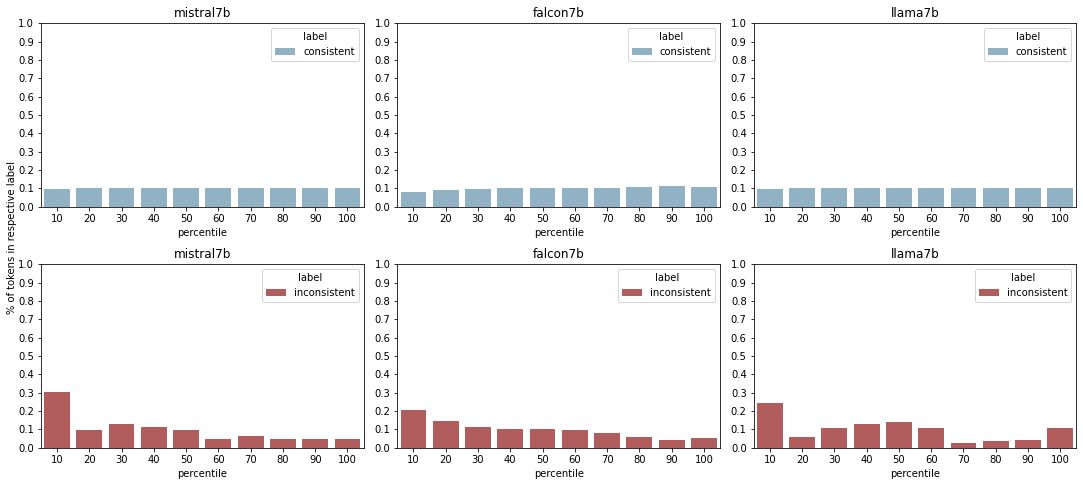

In [176]:
viz_barplot_percentiles(df_format_xsum)

In [83]:
### 20-30% of nonfactual tokens are under 10% of confidence and close to 50 for under 30th percentile
### 

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

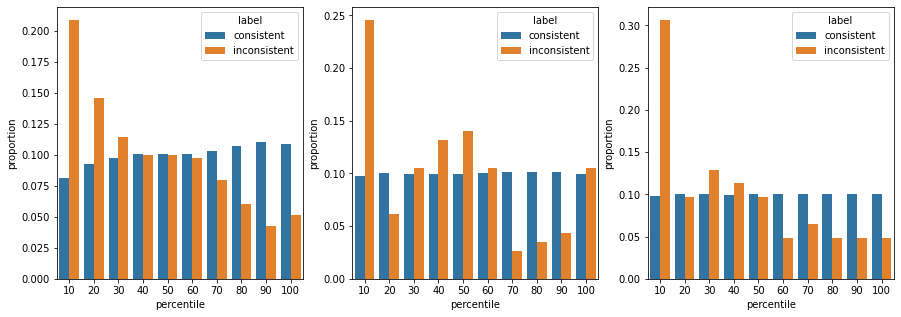

In [63]:
fig, axes = plt.subplots(1, len(sorted(list(set(df_all_models_xsum['model'])))), figsize=(15, 5))

for model_idx, model in enumerate(sorted(list(set(df_all_models_xsum['model'])))):
    df_format_xsum_model = df_format_xsum[df_format_xsum['model'] == model]
    
    sns.barplot(df_format_xsum_model,
                 x = 'percentile',
             y = 'proportion',
            hue = 'label',
                 ax = axes[model_idx]
                )

In [46]:
sorted(list(set(df_all_models_xsum['model'])))

['falcon7b', 'llama7b', 'mistral7b']

In [28]:

def check_new_word(row, prev_row, tokenizer):
    pred_token = row['pred_token_layer32']
    # target_token = eval(row['target_token'].split('_')[-1])
    pred_token_str = tokenizer.decode(pred_token)
    # print(type(prev_row))
    if isinstance(prev_row, pd.core.frame.DataFrame):
        prev_docid = prev_row['docid'].values[0]
        if prev_docid == row['docid']:
            prev_token = prev_row['pred_token_layer32'].values[0]
            prefix_str = tokenizer.decode([prev_token, pred_token])
            if len(prefix_str.split(' ')) != len(pred_token_str.split(' ')):
                return True
    return True

df_model = df_mistral
tokenizer = mistral_tokenizer
row_id = 0

df_rq1_analysis = {
}

for idx, row in df_model.iterrows():
    prev_row = df_model.iloc[[row_id - 1]] if row_id > 0 else None 
    is_new_word = check_new_word(row, prev_row, tokenizer)
    row_id += 1
    
    label = row['label']
    gen_token = row['pred_token_layer32']
    gen_token_prob = row['pred_prob_layer32']
    if is_new_word:
        for layer_idx in range(0, 33):
            pred_prob_key = f'pred_token_layer{layer_idx}'
            pred_token_key = f'pred_prob_layer{layer_idx}'
            
            pred_prob = row[pred_prob_key]
            pred_token = row[pred_token_key]
            for column, column_val in row.items():
                if 'Unnamed' not in column:
                    if column not in df_rq1_analysis:
                        df_rq1_analysis[column] = []
                    df_rq1_analysis[column] += [column_val]
                    

df_rq1_analysis = pd.DataFrame(df_rq1_analysis)
df_rq1_analysis.head()
            

,target_token,label,prev_hidden_state_sim_layer1,prev_hidden_state_sim_layer2,prev_hidden_state_sim_layer3,prev_hidden_state_sim_layer4,prev_hidden_state_sim_layer5,prev_hidden_state_sim_layer6,prev_hidden_state_sim_layer7,prev_hidden_state_sim_layer8,...,top3_predicted_probs_layer31,top3_predicted_tokens_layer31,jsd_layer32,pred_prob_layer32,pred_token_layer32,target_prob_layer32,top3_predicted_probs_layer32,top3_predicted_tokens_layer32,docid,target_token_id
0,dde1ae13-d506-424a-8ae9-17deb4803d4c_3787,0,0.080977,0.887688,0.881926,0.91357,0.92615,0.884319,0.905017,0.903063,...,"[0.9999998807907104, 5.444502804152762e-08, 2....","[3787, 13384, 6133]",0.0,0.995644,3787,0.995644,"[0.9956440925598145, 0.001900083851069212, 0.0...","[3787, 13384, 24]",1701434231:falcon7b-ul2,3787
1,dde1ae13-d506-424a-8ae9-17deb4803d4c_3787,0,0.080977,0.887688,0.881926,0.91357,0.92615,0.884319,0.905017,0.903063,...,"[0.9999998807907104, 5.444502804152762e-08, 2....","[3787, 13384, 6133]",0.0,0.995644,3787,0.995644,"[0.9956440925598145, 0.001900083851069212, 0.0...","[3787, 13384, 24]",1701434231:falcon7b-ul2,3787
2,dde1ae13-d506-424a-8ae9-17deb4803d4c_3787,0,0.080977,0.887688,0.881926,0.91357,0.92615,0.884319,0.905017,0.903063,...,"[0.9999998807907104, 5.444502804152762e-08, 2....","[3787, 13384, 6133]",0.0,0.995644,3787,0.995644,"[0.9956440925598145, 0.001900083851069212, 0.0...","[3787, 13384, 24]",1701434231:falcon7b-ul2,3787
3,dde1ae13-d506-424a-8ae9-17deb4803d4c_3787,0,0.080977,0.887688,0.881926,0.91357,0.92615,0.884319,0.905017,0.903063,...,"[0.9999998807907104, 5.444502804152762e-08, 2....","[3787, 13384, 6133]",0.0,0.995644,3787,0.995644,"[0.9956440925598145, 0.001900083851069212, 0.0...","[3787, 13384, 24]",1701434231:falcon7b-ul2,3787
4,dde1ae13-d506-424a-8ae9-17deb4803d4c_3787,0,0.080977,0.887688,0.881926,0.91357,0.92615,0.884319,0.905017,0.903063,...,"[0.9999998807907104, 5.444502804152762e-08, 2....","[3787, 13384, 6133]",0.0,0.995644,3787,0.995644,"[0.9956440925598145, 0.001900083851069212, 0.0...","[3787, 13384, 24]",1701434231:falcon7b-ul2,3787


In [70]:
df_rq1_analysis = df_mistral

In [9]:
ideas = '''
Some basic questions 

a) Are factual token predictions more confident than nonfactual token predictions? (this would be just last layer) 

b) For each layer -- check proportion of factual tokens predicted at each layer , same for nonfactual tokens
basic gist being if some layers are more responsible than others for generating faithful tokens 

c) For each layer -- show a cumulative proporton of factual vs nonfactual tokens already "predicted" 
d) For each layer -- avg confidence of token predctions of generated factual vs nonfactual tokens 

'''

'''
RQ1 : Distribution of token confidence across (hue is factual vs nonfactual tokens)
- P(o) across layers: How does the probability of generated token change across layers , P(M) - P(O) across layers
- Cumulative: at each layer tthe proportion of tokens already predicted by a previous or current layer (to see if nonfactual surface in last layers)
- Do non cumulative version as well

RQ2: To see where informattion flow drastically changes
- sim(h(l), h(l-1))
- JSD(V, M): JSD between final vocab dist and premature dist


Needed:
P(O) across layers
P(M) across layers
Preicted token at each layer
JSD(V,M) for each layer
sim(H(l), H{l-1)) forr layers 2, 32
0 - 32( 0 is embedding, 1 is layer 1, 32 is last layer))
'''

print(ideas)


Some basic questions 

a) Are factual token predictions more confident than nonfactual token predictions? (this would be just last layer) 

b) For each layer -- check proportion of factual tokens predicted at each layer , same for nonfactual tokens
basic gist being if some layers are more responsible than others for generating faithful tokens 

c) For each layer -- show a cumulative proporton of factual vs nonfactual tokens already "predicted" 
d) For each layer -- avg confidence of token predctions of generated factual vs nonfactual tokens 




In [6]:
''' Token confidence -- p(o) across layers '''
### x axis -- layers
### y axis -- probability of gen token 
### hue --- label 

## df_format = {'layer_num': [], 'gen_token_prob': [], 'label': []}
df_format = {'layer_num': [], 'gen_token_prob': [], 'label': []}

# df_format['layer'] = 
for idx, row in df_mistral.iterrows():
    label = row['label']
    gen_prob_final = row[f'target_prob_layer32']
    
    for layer_num in range(0, 33):
        gen_prob = row[f'target_prob_layer{layer_num}']
        df_format['layer_num'] += [layer_num]
        # df_format['gen_token_prob'] += [round(gen_prob_final - gen_prob, 5)]
        df_format['gen_token_prob'] += [round(gen_prob)]
        df_format['label'] += [label]

df_format = pd.DataFrame(df_format)

<Axes: xlabel='layer_num', ylabel='gen_token_prob'>

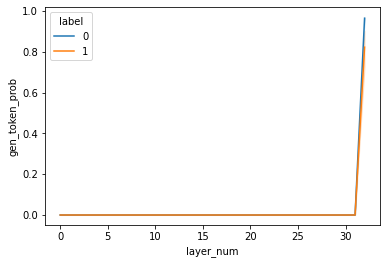

In [7]:
import seaborn as sns

sns.lineplot(df_format,
             x = 'layer_num',
             y = 'gen_token_prob',
             hue = 'label')

In [73]:
''' At each layer proportion of gen tokens already predicted'''
# x axis layer, y axis % of gen tokens predicted, hue label
# df_format = {layer: [], gen_token_predicted: [], label: []}
df_format = {'layer': [], 'gen_token_predicted': [], 'label': []}
for idx, row in df_rq1_analysis.iterrows():
    gen_token = row['pred_token_layer32']
    for layer_num in range(0, 33):
        pred_token = row[f'pred_token_layer{layer_num}']
        gen_surfaced = 0
        if gen_token == pred_token:
            gen_surfaced = 1
        df_format['layer'] += [layer_num]
        df_format['gen_token_predicted'] += [gen_surfaced]
        df_format['label'] += [row['label']]
df_format = pd.DataFrame(df_format)
df_format

,layer,gen_token_predicted,label
0,0,0,0
1,1,0,0
2,2,0,0
3,3,0,0
4,4,0,0
...,...,...,...
72496,28,0,0
72497,29,0,0
72498,30,0,0
72499,31,0,0


<Axes: xlabel='layer', ylabel='gen_token_predicted'>

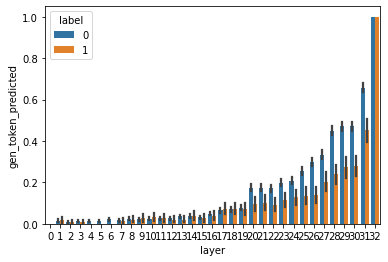

In [74]:
sns.barplot(df_format,
             x = 'layer',
             y = 'gen_token_predicted',
             hue = 'label')

In [97]:
''' At each layer proportion of gen tokens first surfaced '''
# x axis layer, y axis % of gen tokens predicted, hue label
# df_format = {layer: [], gen_token_predicted: [], label: []}
df_format = {'layer': [], 'gen_token_predicted': [], 'label': []}
for idx, row in df_rq1_analysis.iterrows():
    gen_token = row['pred_token_layer32']
    found = False
    for layer_num in range(0, 33):
        pred_token = row[f'pred_token_layer{layer_num}']
        gen_surfaced = 0
        if gen_token == pred_token and not found:
            gen_surfaced = 1
            found = True
        df_format['layer'] += [layer_num]
        df_format['gen_token_predicted'] += [gen_surfaced]
        df_format['label'] += [row['label']]
df_format = pd.DataFrame(df_format)
df_format

,layer,gen_token_predicted,label
0,0,0,0
1,1,0,0
2,2,0,0
3,3,0,0
4,4,0,0
...,...,...,...
72496,28,0,0
72497,29,0,0
72498,30,0,0
72499,31,0,0


<Axes: xlabel='layer', ylabel='gen_token_predicted'>

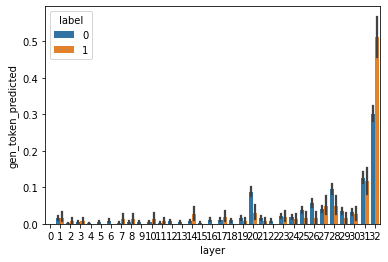

In [98]:
sns.barplot(df_format,
             x = 'layer',
             y = 'gen_token_predicted',
             hue = 'label')

In [78]:
''' At each layer, jsd with last layer'''
# x axis layer, y axis jsd, label 
# df_format = {layer: [], jsd: [], label: []}

df_format = {'layer': [], 'jsd': [], 'label': []}
for idx, row in df_rq1_analysis.iterrows():
    # gen_token = row['pred_token_layer32']
    for layer_num in range(0, 32):
        jsd_token = row[f'jsd_layer{layer_num}']
        df_format['layer'] += [layer_num]
        df_format['jsd'] += [jsd_token]
        df_format['label'] += [row['label']]
df_format = pd.DataFrame(df_format)
df_format

,layer,jsd,label
0,0,0.69293,0
1,1,0.69117,0
2,2,0.69107,0
3,3,0.69147,0
4,4,0.69092,0
...,...,...,...
72496,28,0.68947,0
72497,29,0.68995,0
72498,30,0.69226,0
72499,31,0.69264,0


<Axes: xlabel='layer', ylabel='jsd'>

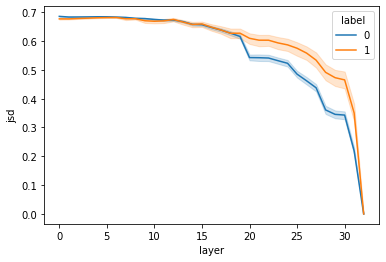

In [80]:
sns.lineplot(df_format,
             x = 'layer',
             y = 'jsd',
             hue = 'label')

In [96]:
df_rq1_analysis.head()

,Unnamed: 0,target_token,label,prev_hidden_state_sim_layer1,prev_hidden_state_sim_layer2,prev_hidden_state_sim_layer3,prev_hidden_state_sim_layer4,prev_hidden_state_sim_layer5,prev_hidden_state_sim_layer6,prev_hidden_state_sim_layer7,...,top3_predicted_probs_layer31,top3_predicted_tokens_layer31,jsd_layer32,pred_prob_layer32,pred_token_layer32,target_prob_layer32,top3_predicted_probs_layer32,top3_predicted_tokens_layer32,docid,target_token_id
1,0,dde1ae13-d506-424a-8ae9-17deb4803d4c_3787,0,0.080977,0.887688,0.881926,0.913570,0.926150,0.884319,0.905017,...,"[0.9999998807907104, 5.444502804152762e-08, 2....","[3787, 13384, 6133]",0.0,0.995644,3787,0.995644,"[0.9956440925598145, 0.001900083851069212, 0.0...","[3787, 13384, 24]",1701434231:falcon7b-ul2,3787
2,0,ec7debbd-c7a0-4bcd-a618-8e4baa136ecb_42402,0,0.099316,0.864542,0.940518,0.916188,0.939494,0.903227,0.917771,...,"[1.0, 3.955975976693523e-18, 3.060248683116279...","[42402, 1615, 38916]",0.0,0.999280,42402,0.999280,"[0.9992799162864685, 0.0004289188655093312, 5....","[42402, 1615, 85]",1701434231:falcon7b-ul2,42402
3,0,3f898cce-aa4e-42ca-89ff-7b2cbd6cd2cd_1135,0,0.093102,0.833745,0.868053,0.863176,0.940298,0.927315,0.930259,...,"[0.9999996423721313, 2.3920947000988235e-07, 1...","[1135, 13384, 3081]",0.0,0.999515,1135,0.999515,"[0.9995150566101074, 6.0128470067866147e-05, 3...","[1135, 13384, 3081]",1701434231:falcon7b-ul2,1135
4,0,6b25d839-2c80-4cbe-9f98-8600560d22cb_4497,0,0.054920,0.820665,0.902982,0.908216,0.938235,0.839363,0.905206,...,"[1.0, 2.0404718767495084e-14, 4.06862270636913...","[4497, 34651, 53134]",0.0,0.988469,4497,0.988469,"[0.9884688258171082, 0.000625031825620681, 0.0...","[4497, 286, 7508]",1701434231:falcon7b-ul2,4497
5,0,f88a54c1-4e48-4989-a759-945857463710_13384,0,0.120763,0.767357,0.750188,0.856828,0.901515,0.879109,0.918956,...,"[1.0, 1.5668320590619955e-13, 9.34824662968364...","[13384, 42451, 42921]",0.0,0.999615,13384,0.999615,"[0.9996151924133301, 4.704869934357703e-05, 3....","[13384, 16789, 22921]",1701434231:falcon7b-ul2,13384


In [ ]:
''' Overconfident vs underconfidentt tokens'''


